In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import os
import time

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

In [2]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'

In [3]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

# Open coastal lat/lon indices

In [4]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

In [5]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [6]:
LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

SF_lat_idx = geo_idx(SF_lat, PRECT_lat)
SF_lon_idx = geo_idx(SF_lon, PRECT_lon)

OD_lat_idx = geo_idx(Oroville_dam_lat, PRECT_lat)
OD_lon_idx = geo_idx(Oroville_dam_lon, PRECT_lon)

#REGION_lat_idx, REGION_lon_idx = SF_lat_idx, SF_lon_idx; REGION_NAME = 'SF'
REGION_lat_idx, REGION_lon_idx = LA_lat_idx, LA_lon_idx; REGION_NAME = 'LA'
#REGION_lat_idx, REGION_lon_idx = OD_lat_idx, OD_lon_idx; REGION_NAME = 'OD'

In [7]:
window=30

# open data sets

In [8]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [9]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

# Create dictionary to store everything

In [10]:
events_dict = {}

# 100yr 3season mean dry

In [11]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_interval = 100
events_per_year = 1

return_val_perc = 100*(1/(return_interval*events_per_year))
print(return_val_perc)





all_events_pic = numpy.load('../100yr_dry_3season_mean/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../100yr_dry_3season_mean/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../100yr_dry_3season_mean/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d.reshape((PRECT_nlat, PRECT_nlon, 40, 180))
all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))  
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events<return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])
        
        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]<return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))


1.0


/Users/baird/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [12]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

# ratios only, not percent change
hist_rcp_counts_ALL_LATLON_smooth_ratios = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_ratios[i,j,:] = hist_rcp_counts_ALL_LATLON_smooth[i,j,:]/pic_counts_ALL_LATLON_equivalent[i,j]

# bootstrapping

In [13]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 10000
boot_window = 100
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
pic_bootstrap_data = numpy.zeros((N_boot,650,boot_window))


In [14]:
pic_counts_ALL_LATLON_peryear = pic_counts_ALL_LATLON/1798

for boot in range(N_boot):
    pic_bootstrap_data[boot,:,:] = all_events_pic[:,t_series_indices[boot,:]]

return_period_values_bootstrap = numpy.zeros((N_boot, len(latlon_indices)))

for boot in range(N_boot):
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = pic_bootstrap_data[boot,latlon_idx,:]       
        return_period_values_bootstrap[boot,latlon_idx] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])/boot_window

return_period_values_bootstrap_reshape = numpy.reshape(return_period_values_bootstrap, (-1,PRECT_nlat,PRECT_nlon))
return_period_values_bootstrap_ratios = return_period_values_bootstrap_reshape/pic_counts_ALL_LATLON_peryear

perc_hi = 90
perc_lo = 10

bootstrap_hi_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_hi, axis=0)
bootstrap_lo_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_lo, axis=0)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [15]:
print(hist_rcp_counts_ALL_LATLON_smooth_ratios.shape)
print(return_period_values_bootstrap_ratios.shape)

(26, 25, 180)
(10000, 26, 25)


In [16]:
print(return_period_values_bootstrap_ratios.shape)
pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

(10000, 26, 25)


In [17]:
events_dict['100yr_3season_dry_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['100yr_3season_dry_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['100yr_3season_dry_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['100yr_3season_pic_count'] = pic_counts_ALL_LATLON
events_dict['100yr_3season_dry_2d_frequency_ratios_30yr_avg'] = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
events_dict['100yr_3season_dry_bootstrap_hi_values'] = bootstrap_hi_value_2d
events_dict['100yr_3season_dry_bootstrap_lo_values'] = bootstrap_lo_value_2d
events_dict['100yr_3season_dry_pvals'] = pvals_bootstrap

# Now calculate time-latitude statistics

In [18]:
# pull out cali coast
return_period_values_bootstrap_ratios_cali_coast = return_period_values_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = hist_rcp_counts_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

# take means across 3 grid boxes
return_period_values_bootstrap_ratios_cali_coast = numpy.nanmean(return_period_values_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios_cali_coast[:,i], hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
events_dict['100yr_3season_dry_timelat_ratios'] = hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast
events_dict['100yr_3season_dry_timelat_pvals'] = pvals_bootstrap_timelat

# 100yr 1season mean dry

In [23]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_interval = 100
events_per_year = 1

return_val_perc = 100*(1/(return_interval*events_per_year))
print(return_val_perc)





all_events_pic = numpy.load('../100yr_dry_season/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../100yr_dry_season/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../100yr_dry_season/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))        
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events<return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])

        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]<return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))

1.0


In [24]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

hist_rcp_counts_ALL_LATLON_smooth_ratios = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_ratios[i,j,:] = hist_rcp_counts_ALL_LATLON_smooth[i,j,:]/pic_counts_ALL_LATLON_equivalent[i,j]

# bootstrapping

In [25]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 10000
boot_window = 100
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
pic_bootstrap_data = numpy.zeros((N_boot,650,boot_window))


In [26]:
pic_counts_ALL_LATLON_peryear = pic_counts_ALL_LATLON/1798

for boot in range(N_boot):
    pic_bootstrap_data[boot,:,:] = all_events_pic[:,t_series_indices[boot,:]]

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_bootstrap = numpy.zeros((N_boot, len(latlon_indices)))
#print(latitude_time_values.shape)

for boot in range(N_boot):
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = pic_bootstrap_data[boot,latlon_idx,:]       
        return_period_values_bootstrap[boot,latlon_idx] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])/boot_window

return_period_values_bootstrap_reshape = numpy.reshape(return_period_values_bootstrap, (-1,PRECT_nlat,PRECT_nlon))
return_period_values_bootstrap_ratios = return_period_values_bootstrap_reshape/pic_counts_ALL_LATLON_peryear

perc_hi = 90
perc_lo = 10

bootstrap_hi_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_hi, axis=0)
bootstrap_lo_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_lo, axis=0)

In [27]:
print(return_period_values_bootstrap_ratios.shape)
pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

(10000, 26, 25)


In [28]:
events_dict['100yr_1season_dry_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['100yr_1season_dry_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['100yr_1season_dry_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['100yr_1season_pic_count'] = pic_counts_ALL_LATLON
events_dict['100yr_1season_dry_2d_frequency_ratios_30yr_avg'] = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
events_dict['100yr_1season_dry_bootstrap_hi_values'] = bootstrap_hi_value_2d
events_dict['100yr_1season_dry_bootstrap_lo_values'] = bootstrap_lo_value_2d
events_dict['100yr_1season_dry_pvals'] = pvals_bootstrap

# Now calculate time-latitude statistics

In [29]:
# pull out cali coast
return_period_values_bootstrap_ratios_cali_coast = return_period_values_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = hist_rcp_counts_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

# take means across 3 grid boxes
return_period_values_bootstrap_ratios_cali_coast = numpy.nanmean(return_period_values_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios_cali_coast[:,i], hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
events_dict['100yr_1season_dry_timelat_ratios'] = hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast
events_dict['100yr_1season_dry_timelat_pvals'] = pvals_bootstrap_timelat

# 25yr wet events

In [32]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_interval = 25
events_per_year = 1

return_val_perc = 100*(1-1/(return_interval*events_per_year))
print(return_val_perc)




all_events_pic = numpy.load('../25yr_wet_season/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../25yr_wet_season/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../25yr_wet_season/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))        
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events>return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events>return_period_values_pic[latlon_idx,0])

        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]>return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))



96.0


In [33]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

hist_rcp_counts_ALL_LATLON_smooth_ratios = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_ratios[i,j,:] = hist_rcp_counts_ALL_LATLON_smooth[i,j,:]/pic_counts_ALL_LATLON_equivalent[i,j]



In [34]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 10000
boot_window = 25
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
#t_series_indices = numpy.random.randint(low=0, high=1797-boot_window, size=N_boot)
pic_bootstrap_data = numpy.zeros((N_boot,650,boot_window))


In [35]:
pic_counts_ALL_LATLON_peryear = pic_counts_ALL_LATLON/1798

for boot in range(N_boot):
    #pic_bootstrap_data[boot,:,:] = all_events_pic[:,t_series_indices[boot]:t_series_indices[boot]+boot_window]
    pic_bootstrap_data[boot,:,:] = all_events_pic[:,t_series_indices[boot,:]]

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_bootstrap = numpy.zeros((N_boot, len(latlon_indices)))
#print(latitude_time_values.shape)

for boot in range(N_boot):
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = pic_bootstrap_data[boot,latlon_idx,:]       
        return_period_values_bootstrap[boot,latlon_idx] = numpy.nansum(seasonal_events>return_period_values_pic[latlon_idx,0])/boot_window

return_period_values_bootstrap_reshape = numpy.reshape(return_period_values_bootstrap, (-1,PRECT_nlat,PRECT_nlon))
return_period_values_bootstrap_ratios = return_period_values_bootstrap_reshape/pic_counts_ALL_LATLON_peryear

perc_hi = 90
perc_lo = 10

bootstrap_hi_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_hi, axis=0)
bootstrap_lo_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_lo, axis=0)

In [36]:


print(return_period_values_bootstrap_ratios.shape)
pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

(10000, 26, 25)


In [37]:
events_dict['25yr_1season_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['25yr_1season_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['25yr_1season_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['25yr_1season_wet_pic_count'] = pic_counts_ALL_LATLON
events_dict['25yr_1season_wet_2d_frequency_ratios_30yr_avg'] = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
events_dict['25yr_1season_wet_bootstrap_hi_values'] = bootstrap_hi_value_2d
events_dict['25yr_1season_wet_bootstrap_lo_values'] = bootstrap_lo_value_2d
events_dict['25yr_1season_wet_pvals'] = pvals_bootstrap

# Now calculate time-latitude statistics

In [38]:
# pull out cali coast
return_period_values_bootstrap_ratios_cali_coast = return_period_values_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = hist_rcp_counts_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

# take means across 3 grid boxes
return_period_values_bootstrap_ratios_cali_coast = numpy.nanmean(return_period_values_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios_cali_coast[:,i], hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
events_dict['25yr_1season_wet_timelat_ratios'] = hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast
events_dict['25yr_1season_wet_timelat_pvals'] = pvals_bootstrap_timelat

# 200yr 40d wet events

In [41]:
return_interval = 200
events_per_year = 151/40

return_val_perc = 100*(1-1/(return_interval*events_per_year))
print(return_val_perc)

#print(1798*151/40-return_val_perc/100.*1798*151/40)

99.86754966887416


In [42]:
# calculate ratio of frequencies of exceedance
pic_counts = 10 #return_period_values_pic[:,1]
hist_rcp_counts = numpy.load('../200yr_40d_wet_events/csv_files/event_count.npy')#return_period_values_hist_rcp[:,:,2]

return_period_values_pic = pandas.read_csv('../200yr_40d_wet_events/csv_files/return_period_values_pic_df_update.csv').values[:,1:]

#pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_ALL_LATLON_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon, 40, 180))

all_events_hist_rcp_3d_reshape = numpy.copy(hist_rcp_counts_ALL_LATLON_reshape)
print(all_events_hist_rcp_3d_reshape.shape)

#hist_rcp_counts_ALL_LATLON_40members = hist_rcp_counts_2d[REGION_lat_idx,REGION_lon_idx,:,:]
hist_rcp_counts_ALL_LATLON_summed_across_40 = numpy.sum(hist_rcp_counts_ALL_LATLON_reshape[:,:,:,:], axis=2)
hist_rcp_counts_ALL_LATLON = numpy.copy(hist_rcp_counts_ALL_LATLON_summed_across_40)

pic_counts_ALL_LATLON = pic_counts*numpy.ones((PRECT_nlat,PRECT_nlon))
#hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

hist_rcp_counts_ALL_LATLON_smooth_ratios = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_ratios[i,j,:] = hist_rcp_counts_ALL_LATLON_smooth[i,j,:]/pic_counts_ALL_LATLON_equivalent[i,j]

(26, 25, 40, 180)


# bootstrap

In [43]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 100
boot_window = 200
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
#t_series_indices = numpy.random.randint(low=0, high=1797-boot_window, size=N_boot)

# ========== add 151 as a dimension ==========
pic_bootstrap_data = numpy.zeros((N_boot,650,boot_window,151))
# ============================================

In [44]:
all_events_pic = numpy.load('../200yr_40d_wet_events/csv_files/all_events_pic_3d.npy')

In [45]:
pic_counts_ALL_LATLON_peryear = pic_counts_ALL_LATLON/1798

for boot in range(N_boot):
    #pic_bootstrap_data[boot,:,:] = all_events_pic[:,t_series_indices[boot]:t_series_indices[boot]+boot_window]
    pic_bootstrap_data[boot,:,:,:] = all_events_pic[:,t_series_indices[boot,:],:]
print(pic_bootstrap_data.shape)

pic_bootstrap_counts = numpy.zeros((N_boot,len(latlon_indices),boot_window), dtype=numpy.int)
for boot in range(N_boot):
    for latlon_idx in range(len(latlon_indices)):
        pic_val = return_period_values_pic[latlon_idx,0]
        for year_idx in range(boot_window):
            if numpy.nansum(pic_bootstrap_data[boot,latlon_idx,year_idx,:]>pic_val)>0:
                daycount=0
                while daycount<151:
                    if pic_bootstrap_data[boot,latlon_idx,year_idx,daycount] > pic_val:
                        pic_bootstrap_counts[boot,latlon_idx,year_idx] += 1
                        daycount += 40
                    else:
                        daycount += 1

(100, 650, 200, 151)


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [46]:
return_period_values_bootstrap_peryear = numpy.mean(pic_bootstrap_counts, axis=2)
return_period_values_bootstrap_ratios = return_period_values_bootstrap_peryear.reshape((N_boot,PRECT_nlat,PRECT_nlon))/pic_counts_ALL_LATLON_peryear

perc_hi = 90
perc_lo = 10

bootstrap_hi_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_hi, axis=0)
bootstrap_lo_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_lo, axis=0)

In [47]:
print(return_period_values_bootstrap_ratios.shape)
pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

(100, 26, 25)


In [48]:
events_dict['200yr_40d_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['200yr_40d_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['200yr_40d_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['200yr_40d_wet_pic_count'] = pic_counts_ALL_LATLON
events_dict['200yr_40d_wet_2d_frequency_ratios_30yr_avg'] = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
events_dict['200yr_40d_wet_bootstrap_hi_values'] = bootstrap_hi_value_2d
events_dict['200yr_40d_wet_bootstrap_lo_values'] = bootstrap_lo_value_2d
events_dict['200yr_40d_wet_pvals'] = pvals_bootstrap

# Calculate time-latitude statistics

In [49]:
# pull out cali coast
return_period_values_bootstrap_ratios_cali_coast = return_period_values_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = hist_rcp_counts_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

# take means across 3 grid boxes
return_period_values_bootstrap_ratios_cali_coast = numpy.nanmean(return_period_values_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios_cali_coast[:,i], hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [50]:
events_dict['200yr_40d_wet_timelat_ratios'] = hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast
events_dict['200yr_40d_wet_timelat_pvals'] = pvals_bootstrap_timelat

# do seasonal whiplash calculations

In [52]:
filename = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calcs_and_plots/whiplash/calculations/seasonal_whiplash_PIC_low_to_high.nc'
ncfile = netCDF4.Dataset(filename, 'r', 'NetCDF4')
whiplash_events_pic = ncfile.variables['whiplash_events'][:]

filename = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calcs_and_plots/whiplash/calculations/seasonal_whiplash_hist_rcp_low_to_high.nc'
ncfile = netCDF4.Dataset(filename, 'r', 'NetCDF4')
whiplash_events_hist_rcp = ncfile.variables['seasonal_total'][:]

In [53]:
whiplash_count_pic = numpy.sum(whiplash_events_pic==1, axis=0)
whiplash_count_pic_mean = numpy.array(whiplash_count_pic)/1798.

# sum hist+rcp across ensemble members, then divide by 40
whiplash_count_hist_rcp = numpy.sum(whiplash_events_hist_rcp==1, axis=1)
whiplash_count_hist_rcp_mean = numpy.array(whiplash_count_hist_rcp)/40.

whiplash_ratios_change = 100*numpy.array((whiplash_count_hist_rcp==1) - whiplash_count_pic_mean)/(whiplash_count_pic_mean)
whiplash_ratios_mean = 100*whiplash_count_hist_rcp_mean/whiplash_count_pic_mean
whiplash_ratios = whiplash_count_hist_rcp/whiplash_count_pic_mean
#whiplash_ratios = numpy.array()

In [54]:
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((whiplash_count_hist_rcp.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[:,i,j] = pandas.Series(whiplash_count_hist_rcp[:,i,j]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = whiplash_count_pic/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((whiplash_count_hist_rcp.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[:,i,j] = (hist_rcp_counts_ALL_LATLON_smooth[:,i,j] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

hist_rcp_counts_ALL_LATLON_smooth_ratios = numpy.zeros((whiplash_count_hist_rcp.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_ratios[:,i,j] = hist_rcp_counts_ALL_LATLON_smooth[:,i,j]/pic_counts_ALL_LATLON_equivalent[i,j]

In [55]:
count_ratio_2d = hist_rcp_counts_ALL_LATLON_smooth_ratios[-15,:,:]
print(count_ratio_2d.shape)

(26, 25)


# bootstrap for whiplash

In [56]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 10000
boot_window = 100
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
#t_series_indices = numpy.random.randint(low=0, high=1797-boot_window, size=N_boot)
pic_bootstrap_data = numpy.zeros((N_boot,boot_window,PRECT_nlat,PRECT_nlon))

pic_counts_ALL_LATLON_peryear = whiplash_count_pic/1798

for boot in range(N_boot):
    #pic_bootstrap_data[boot,:,:,:] = whiplash_events_pic[t_series_indices[boot]:t_series_indices[boot]+boot_window,:,:]
    pic_bootstrap_data[boot,:,:,:] = whiplash_events_pic[t_series_indices[boot,:],:,:]

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
whiplash_events_bootstrap = numpy.zeros((N_boot, PRECT_nlat, PRECT_nlon))
#print(latitude_time_values.shape)

for boot in range(N_boot):
    for i in range(PRECT_nlat):
        for j in range(PRECT_nlon):
            seasonal_events = pic_bootstrap_data[boot,:,i,j] 
            #print(seasonal_events.shape, whiplash_events_bootstrap.shape)
            whiplash_events_bootstrap[boot,i,j] = numpy.sum(seasonal_events==1)/boot_window

return_period_values_bootstrap_reshape = numpy.reshape(whiplash_events_bootstrap, (-1,PRECT_nlat,PRECT_nlon))
return_period_values_bootstrap_ratios = return_period_values_bootstrap_reshape/pic_counts_ALL_LATLON_peryear

perc_hi = 90
perc_lo = 10

bootstrap_hi_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_hi, axis=0)
bootstrap_lo_value_2d = numpy.nanpercentile(return_period_values_bootstrap_ratios, q=perc_lo, axis=0)

print(return_period_values_bootstrap_ratios.shape)
pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = hist_rcp_counts_ALL_LATLON_smooth_ratios[-15,:,:]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

(10000, 26, 25)


In [57]:
hist_rcp_counts_ALL_LATLON_smooth_ratios = hist_rcp_counts_ALL_LATLON_smooth_ratios.transpose(1,2,0)
events_dict['whiplash_pic_count'] = whiplash_count_pic
events_dict['whiplash_2d_frequency_ratios_30yr_avg'] = hist_rcp_counts_ALL_LATLON_smooth_ratios[:,:,-15]
events_dict['whiplash_pvals'] = pvals_bootstrap

In [58]:
print(hist_rcp_counts_ALL_LATLON_smooth_ratios.shape)

(26, 25, 180)


# Time-latitude calculations

In [59]:
print(hist_rcp_counts_ALL_LATLON_smooth_ratios.shape)
print(return_period_values_bootstrap_ratios.shape)

(26, 25, 180)
(10000, 26, 25)


In [60]:
# pull out cali coast
return_period_values_bootstrap_ratios_cali_coast = return_period_values_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = hist_rcp_counts_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

# take means across 3 grid boxes
return_period_values_bootstrap_ratios_cali_coast = numpy.nanmean(return_period_values_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

print(hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape)
print(return_period_values_bootstrap_ratios_cali_coast.shape)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(return_period_values_bootstrap_ratios_cali_coast[:,i], hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

(11, 180)
(10000, 11)


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [61]:
events_dict['whiplash_timelat_ratios'] = hist_rcp_counts_ALL_LATLON_smooth_ratios_cali_coast
events_dict['whiplash_timelat_pvals'] = pvals_bootstrap_timelat

# month-to-month whiplash (monthly stdev)

In [127]:
# import monthly pic data
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain_MONTHLY_TOTALS/'
monthly_data_pic = numpy.load(working_dir+'member_005_years_0402-2200_threshold_0.1mmday_whole_domain.npy')
#print(monthly_data_pic.shape)
# (26, 25, 1799, 12)

monthly_data_pic_NDJFM = numpy.zeros((26,25,1798,5))

monthly_data_pic_NDJFM[:,:,:,0] = monthly_data_pic[:,:,:1798,10]
monthly_data_pic_NDJFM[:,:,:,1] = monthly_data_pic[:,:,:1798,11]
monthly_data_pic_NDJFM[:,:,:,2] = monthly_data_pic[:,:,1:,0]
monthly_data_pic_NDJFM[:,:,:,3] = monthly_data_pic[:,:,1:,1]
monthly_data_pic_NDJFM[:,:,:,4] = monthly_data_pic[:,:,1:,2]

In [128]:
# import monthly RCP data
monthly_data_hist_rcp = []
for ens_name in ensemble_names:
    monthly_data_hist_rcp.append(numpy.load(working_dir+'PRECT_monthly_data_member_' +ens_name+ '_years_1920-2100_threshold_0.1mmday_whole_domain.npy'))
monthly_data_hist_rcp = numpy.array((monthly_data_hist_rcp))
#print(monthly_data_hist_rcp.shape)
# (40, 26, 25, 181, 12)

# store just NDJFM
monthly_data_hist_rcp_NDJFM = numpy.zeros((40,26,25,180,5))
monthly_data_hist_rcp_NDJFM[:,:,:,:,0] = monthly_data_hist_rcp[:,:,:,:180,10]
monthly_data_hist_rcp_NDJFM[:,:,:,:,1] = monthly_data_hist_rcp[:,:,:,:180,11]
monthly_data_hist_rcp_NDJFM[:,:,:,:,2] = monthly_data_hist_rcp[:,:,:,1:,0]
monthly_data_hist_rcp_NDJFM[:,:,:,:,3] = monthly_data_hist_rcp[:,:,:,1:,1]
monthly_data_hist_rcp_NDJFM[:,:,:,:,4] = monthly_data_hist_rcp[:,:,:,1:,2]

In [129]:
print(monthly_data_pic_NDJFM.shape)
print(monthly_data_hist_rcp_NDJFM.shape)

(26, 25, 1798, 5)
(40, 26, 25, 180, 5)


# calculate stdev at each grid point for each year

In [130]:
monthly_stdev_hist_rcp = numpy.zeros((26,25,180))
monthly_stdev_pic = numpy.zeros((26,25))
monthly_stdev_pic_peryear = numpy.zeros((26,25,1798))
monthly_stdev_pic_peryear_norm = numpy.zeros((26,25,1798))

for i in range(26):
    for j in range(25):
        for t in range(180):
            monthly_stdev_hist_rcp[i,j,t] = numpy.std( monthly_data_hist_rcp_NDJFM[:,i,j,t,:].flatten(), ddof=1)

for i in range(26):
    for j in range(25):
        monthly_stdev_pic[i,j] = numpy.std( monthly_data_pic_NDJFM[i,j,:,:].flatten(), ddof=1)

for t in range(1798):
    for i in range(PRECT_nlat):
        for j in range(PRECT_nlon):
            monthly_stdev_pic_peryear[i,j,t] = numpy.std( monthly_data_pic_NDJFM[i,j,t,:])
    monthly_stdev_pic_peryear_norm[:,:,t] = monthly_stdev_pic_peryear[:,:,t]/monthly_stdev_pic

In [131]:
whiplash_monthly_ALL_LATLON_smooth = numpy.zeros((monthly_stdev_hist_rcp.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        whiplash_monthly_ALL_LATLON_smooth[i,j,:] = pandas.Series(monthly_stdev_hist_rcp[i,j,:]).rolling(window=window, center=True).mean()

whiplash_monthly_ALL_LATLON_smooth_ratios = numpy.zeros((monthly_stdev_hist_rcp.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        whiplash_monthly_ALL_LATLON_smooth_ratios[i,j,:] = whiplash_monthly_ALL_LATLON_smooth[i,j,:]/monthly_stdev_pic[i,j]

# Generate bootstrap version and avoid just-PIC-distro approach

In [155]:
# bootstrap:  create a bunch of fake PIC time series to generate error bars for internal variability
N_boot = 10000
boot_window = 40
t_series_indices = numpy.random.randint(low=0, high=1797, size=(N_boot,boot_window))
pic_bootstrap_data = numpy.zeros((N_boot,PRECT_nlat,PRECT_nlon,boot_window,5))

for boot in range(N_boot):
    pic_bootstrap_data[boot,:,:,:,:] = monthly_data_pic_NDJFM[:,:,t_series_indices[boot,:],:]

whiplash_monthly_bootstrap = numpy.zeros((N_boot, PRECT_nlat, PRECT_nlon))

for boot in range(N_boot):
    for i in range(PRECT_nlat):
        for j in range(PRECT_nlon):
            seasonal_events = pic_bootstrap_data[boot,i,j,:,:] 
            whiplash_monthly_bootstrap[boot,i,j] = numpy.std(seasonal_events, ddof=1)

whiplash_monthly_bootstrap_ratios = whiplash_monthly_bootstrap/monthly_stdev_pic

pvals_bootstrap = numpy.zeros((PRECT_nlat,PRECT_nlon))

ratios_to_test = whiplash_monthly_ALL_LATLON_smooth_ratios[:,:,-15]
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        pvals_bootstrap[i,j] = scipy.stats.percentileofscore(whiplash_monthly_bootstrap_ratios[:,i,j], ratios_to_test[i,j])
pvals_bootstrap /= 100.
pvals_bootstrap = 1-pvals_bootstrap

In [156]:
events_dict['whiplash_monthly_pic'] = monthly_stdev_pic
events_dict['whiplash_monthly_2d_frequency_ratios_30yr_avg'] = whiplash_monthly_ALL_LATLON_smooth_ratios[:,:,-15]
#events_dict['monthly_stdev_pvals'] = pvals_bootstrap
events_dict['whiplash_monthly_pvals'] = pvals_bootstrap

In [157]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

(26, 25)


/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


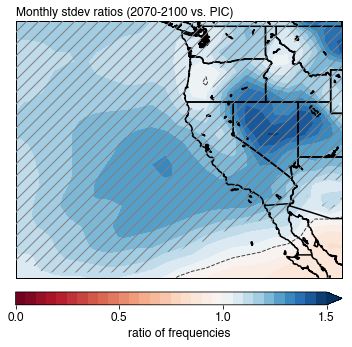

In [159]:
count_ratio_2d = whiplash_monthly_ALL_LATLON_smooth_ratios[:,:,-15]
fill_hi = pvals_bootstrap<=0.1
print(count_ratio_2d.shape)

fontsize=12
contour_levels = numpy.arange(0,1.51,0.05)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

#pr_map = map.contourf(xi, yi, count_ratio_2d, cmap='gist_earth_r', levels=contour_levels, zorder=2, extend='max', latlon=True)

pr_map = map.contourf(xi, yi, count_ratio_2d, \
                      #cmap='inferno', \
                      cmap='RdBu', \
                      norm=MidpointNormalize(midpoint=1.0), \
                      levels=contour_levels, \
                      zorder=2, \
                      extend='max', \
                      latlon=True)
contour_plot = map.contour(xi, yi, count_ratio_2d, \
                         levels=[0.5,1.,1.5,2], \
                         colors='0.25', \
                         linewidths=[1]*1+[2]+[1]*2, \
                         linestyles=['--']*1+[':']+['-']*2, \
                         )


contour_pval_hi = map.contourf(xi, yi, fill_hi, levels=[0,0.5,1.5], hatches=[None,'//'], colors='none', zorder=3)

# new_levels = []
# for i in contour_plot.levels:
#     if i in [0.5,1.5]:
#         new_levels.append('{:.1f}'.format(i))
#     else:
#         new_levels.append('{:.0f}'.format(i))
# contour_plot.levels = new_levels
# mp.clabel(contour_plot, fontsize=fontsize-2, colors=['0.25']*7+['0.75']*5)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('ratio of frequencies', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(contour_levels)
cbar.set_ticks([0,0.5,1,1.5,2])

ax.text(s='Monthly stdev ratios (2070-2100 vs. PIC)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
#mp.savefig('25yr_return_values_seasonal_accumulation_RATIOS.pdf', transparent=True, bbox_inches='tight')

# Time-latitude calculations

In [120]:
# pull out cali coast
print(whiplash_monthly_bootstrap_ratios.shape)
whiplash_monthly_bootstrap_ratios_cali_coast = whiplash_monthly_bootstrap_ratios[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast = whiplash_monthly_ALL_LATLON_smooth_ratios[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:]

print(whiplash_monthly_bootstrap_ratios_cali_coast.shape)
# take means across 3 grid boxes
whiplash_monthly_bootstrap_ratios_cali_coast = numpy.nanmean(whiplash_monthly_bootstrap_ratios_cali_coast.reshape((-1,11,3)), axis=2)
whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast = numpy.nanmean(whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast.reshape((11,3,-1)), axis=1)

print(whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast.shape)
print(return_period_values_bootstrap_ratios_cali_coast.shape)

# at each time-lat point, calculate the pval stuff
pvals_bootstrap_timelat = numpy.zeros((whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast.shape))*numpy.nan
for i in range(pvals_bootstrap_timelat.shape[0]):
    for t in range(pvals_bootstrap_timelat.shape[1]):
        pvals_bootstrap_timelat[i,t] = scipy.stats.percentileofscore(whiplash_monthly_bootstrap_ratios_cali_coast[:,i], whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast[i,t])
pvals_bootstrap_timelat /= 100.
pvals_bootstrap_timelat = 1-pvals_bootstrap_timelat

(10000, 26, 25)
(10000, 33)
(11, 180)
(10000, 11)


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/baird/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [121]:
events_dict['whiplash_monthly_timelat_ratios'] = whiplash_monthly_ALL_LATLON_smooth_ratios_cali_coast
events_dict['whiplash_monthly_timelat_pvals'] = pvals_bootstrap_timelat

# save netcdf file for maps

In [126]:
units_list = ['30yr mean frequency ratio (2070-2100 vs PIC)',\
              'P-values from bootstrap distribution'] * 6

keys_save_2d = [\
'100yr_3season_dry_2d_frequency_ratios_30yr_avg', \
'100yr_3season_dry_pvals', \

'100yr_1season_dry_2d_frequency_ratios_30yr_avg', \
'100yr_1season_dry_pvals', \

'25yr_1season_wet_2d_frequency_ratios_30yr_avg', \
'25yr_1season_wet_pvals', \

'200yr_40d_wet_2d_frequency_ratios_30yr_avg', \
'200yr_40d_wet_pvals', \

'whiplash_2d_frequency_ratios_30yr_avg', \
'whiplash_pvals', \

'whiplash_monthly_2d_frequency_ratios_30yr_avg', \
'whiplash_monthly_pvals' ]


# save hist clim
filename = 'frequency_change_maps_and_sig_vals_'+'LAT_LON'+'_with_whiplash.nc'

if os.path.exists(filename):
    print('file exists')
    os.remove(filename)

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_nlat)
lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lat_var[:] = PRECT_lat
lat_var.units = 'degrees North'

lon_dim = ncfile.createDimension('lon', PRECT_nlon)
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lon_var[:] = PRECT_lon
lon_var.units = 'degrees East'

for key in range(len(keys_save_2d)):
    variable = ncfile.createVariable(keys_save_2d[key], 'f4', ('lat', 'lon',), fill_value=numpy.nan)
    print(keys_save_2d[key])
    print(events_dict[keys_save_2d[key]].shape)
    variable[:] = events_dict[keys_save_2d[key]]
    variable.units = units_list[key]

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

file exists
100yr_3season_dry_2d_frequency_ratios_30yr_avg
(26, 25)
100yr_3season_dry_pvals
(26, 25)
100yr_1season_dry_2d_frequency_ratios_30yr_avg
(26, 25)
100yr_1season_dry_pvals
(26, 25)
25yr_1season_wet_2d_frequency_ratios_30yr_avg
(26, 25)
25yr_1season_wet_pvals
(26, 25)
200yr_40d_wet_2d_frequency_ratios_30yr_avg
(26, 25)
200yr_40d_wet_pvals
(26, 25)
whiplash_2d_frequency_ratios_30yr_avg
(26, 25)
whiplash_pvals
(26, 25)
whiplash_monthly_2d_frequency_ratios_30yr_avg
(26, 25)
whiplash_monthly_pvals
(26, 25)
frequency_change_maps_and_sig_vals_LAT_LON_with_whiplash.nc saved


# Save time-latitude files

In [123]:
# convert times
year_list = numpy.arange(1921,2101)
time_datetime = [datetime.datetime(i,1,15) for i in year_list]
time_nc = netCDF4.date2num(time_datetime, units='days since 1920-01-01', calendar='standard')

In [124]:
PRECT_lat_subset = PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])]

In [125]:
units_list = ['30yr running mean frequency ratio (time-latitude)',\
              'P-values from bootstrap distribution'] * 6

keys_save_2d = [\
'100yr_3season_dry_timelat_ratios', \
'100yr_3season_dry_timelat_pvals', \

'100yr_1season_dry_timelat_ratios', \
'100yr_1season_dry_timelat_pvals', \

'25yr_1season_wet_timelat_ratios', \
'25yr_1season_wet_timelat_pvals', \

'200yr_40d_wet_timelat_ratios', \
'200yr_40d_wet_timelat_pvals', \

'whiplash_timelat_ratios', \
'whiplash_timelat_pvals', \

'whiplash_monthly_timelat_ratios', \
'whiplash_monthly_timelat_pvals' ]

# save hist clim
filename = 'frequency_change_maps_and_sig_vals_'+'TIME_LATITUDE'+'_with_whiplash.nc'

if os.path.exists(filename):
    print('file exists')
    os.remove(filename)

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat_subset.size)
time_dim = ncfile.createDimension('time', len(year_list))

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
time_var = ncfile.createVariable('time', 'f4', ('time',))
lat_var[:] = PRECT_lat_subset
time_var[:] = time_nc
lat_var.units = 'degrees_north'
time_var.units = 'days since 1920-01-01'
time_var.description = 'Reported for yearly (seasonal) values; no smoothing or averaging'

for key in range(len(keys_save_2d)):
    variable = ncfile.createVariable(keys_save_2d[key], 'f4', ('lat', 'time',), fill_value=numpy.nan)
    print(keys_save_2d[key])
    print(events_dict[keys_save_2d[key]].shape)
    variable[:] = events_dict[keys_save_2d[key]]
    variable.units = units_list[key]

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

file exists
100yr_3season_dry_timelat_ratios
(11, 180)
100yr_3season_dry_timelat_pvals
(11, 180)
100yr_1season_dry_timelat_ratios
(11, 180)
100yr_1season_dry_timelat_pvals
(11, 180)
25yr_1season_wet_timelat_ratios
(11, 180)
25yr_1season_wet_timelat_pvals
(11, 180)
200yr_40d_wet_timelat_ratios
(11, 180)
200yr_40d_wet_timelat_pvals
(11, 180)
whiplash_timelat_ratios
(11, 180)
whiplash_timelat_pvals
(11, 180)
whiplash_monthly_timelat_ratios
(11, 180)
whiplash_monthly_timelat_pvals
(11, 180)
frequency_change_maps_and_sig_vals_TIME_LATITUDE_with_whiplash.nc saved
